In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 
  
# metadata 
print(online_retail.metadata) 
  
# variable information 
print(online_retail.variables) 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [2]:
import pandas as pd
df = online_retail.data.features
print(df.head())

                           Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom  


In [3]:
print(df.columns)

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country'],
      dtype='object')


In [4]:
# Shape and summary
print("Shape:", online_retail.data.features.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic stats:\n", df.describe())

Shape: (541909, 6)

Missing values:
 Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Basic stats:
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
df = df.dropna(subset=['Description','CustomerID']) #Drop 'Description' and 'CustomerID' Columns 

# Shape and summary (After Drop null descriptions and Customer IDs) 
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic stats:\n", df.describe())

Shape: (406829, 6)

Missing values:
 Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Basic stats:
             Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


# Data Analytics & Visualization

## Total Revenue & Top Line Stats

In [8]:
# Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Total revenue
total_revenue = df['TotalPrice'].sum()
print(f"\n💰 Total Revenue: £{total_revenue:,.2f}")

# Unique products and customers
print("🛍️ Unique Products:", df['Description'].nunique())
print("👥 Unique Customers:", df['CustomerID'].nunique())


💰 Total Revenue: £8,300,065.81
🛍️ Unique Products: 3896
👥 Unique Customers: 4372


/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/4122826995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


## Top Products by Revenue & Quantity

In [10]:
# Top 10 by Revenue
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\n🏆 Top 10 Products by Revenue:\n", top_products)

# Top 10 by Quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\n📦 Top 10 Products by Quantity Sold:\n", top_quantity)


🏆 Top 10 Products by Revenue:
 Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64

📦 Top 10 Products by Quantity Sold:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             253

/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/1742677325.py:10: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


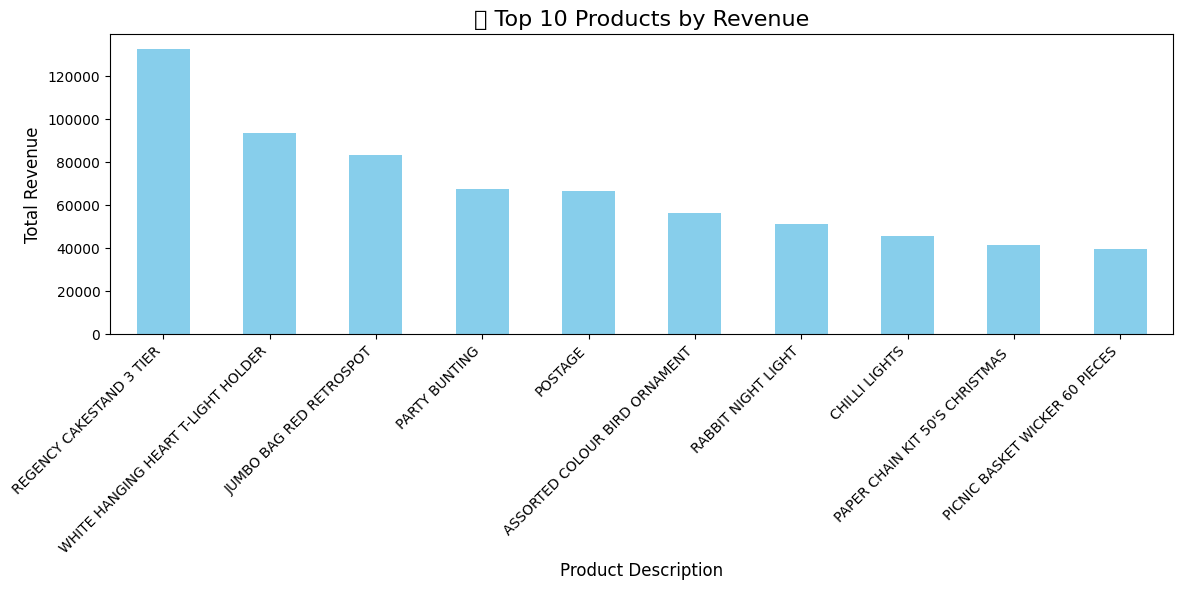

/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/1742677325.py:20: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


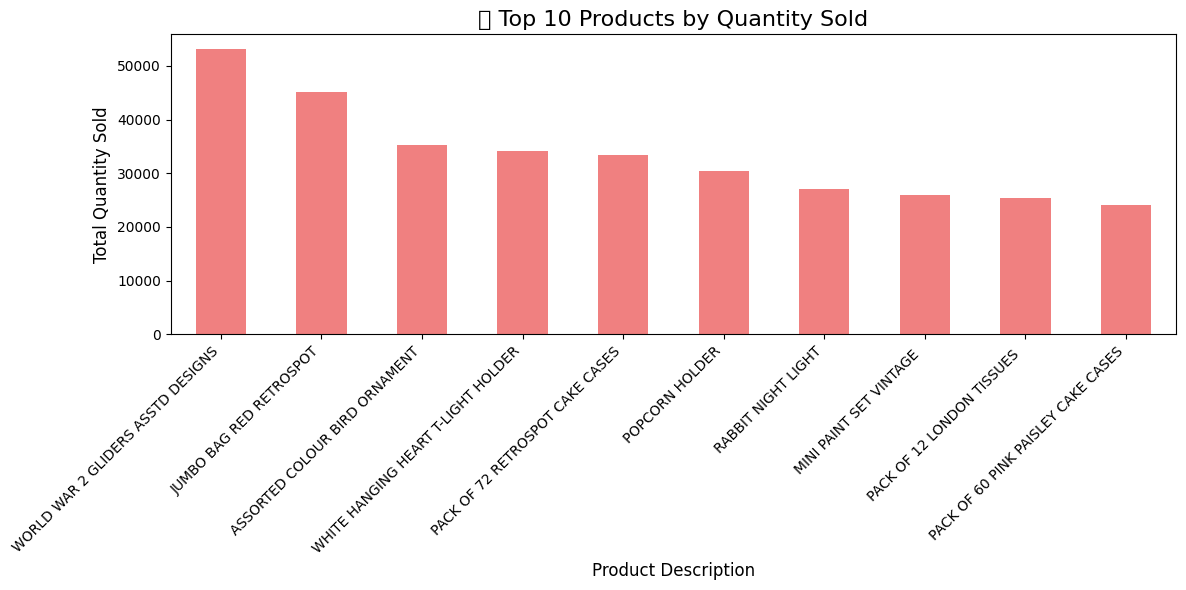

In [11]:
import matplotlib.pyplot as plt

# Bar chart for Top 10 Products by Revenue
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('🏆 Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart for Top 10 Products by Quantity Sold
plt.figure(figsize=(12, 6))
top_quantity.plot(kind='bar', color='lightcoral')
plt.title('📦 Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Sales by Country

In [13]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Filter out United Kingdom to analyze foreign performance
foreign_sales = country_sales.drop('United Kingdom')

print("\n🌍 Sales by Country:\n", country_sales.head(10))


🌍 Sales by Country:
 Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


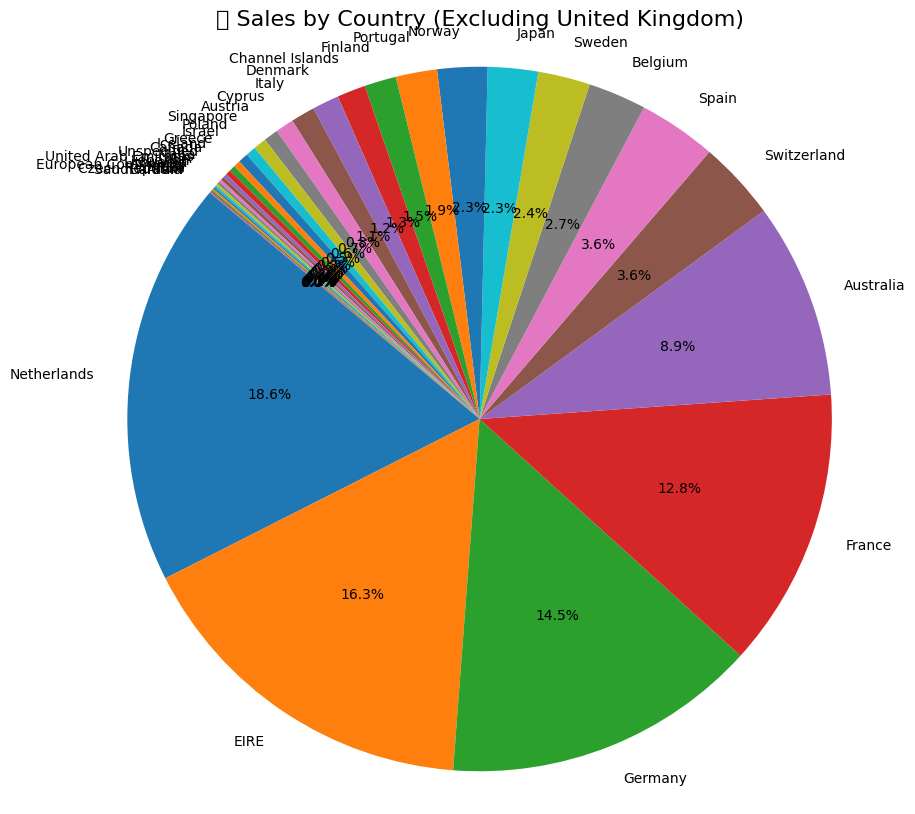

In [14]:
# Pie chart for Foreign Sales by Country (excluding UK)
plt.figure(figsize=(10, 10))
plt.pie(foreign_sales, labels=foreign_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('🌍 Sales by Country (Excluding United Kingdom)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Top 10 foreign countries

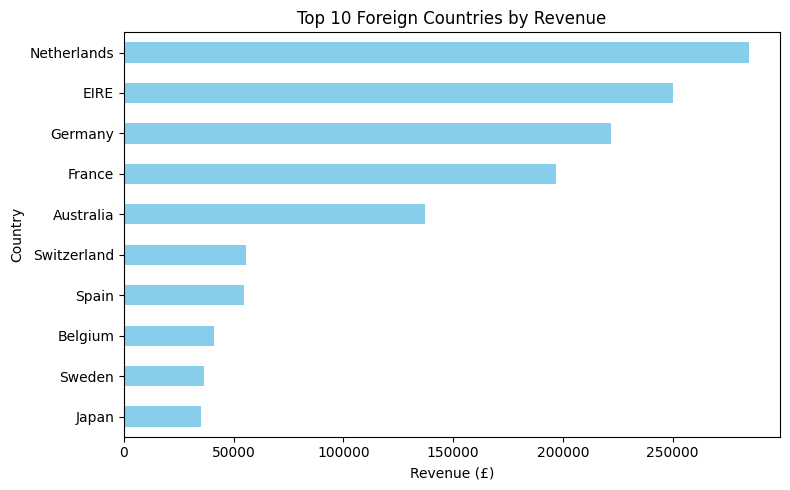

In [16]:
foreign_sales.head(10).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Top 10 Foreign Countries by Revenue")
plt.xlabel("Revenue (£)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Time-based Sales Trend

/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/979602825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/979602825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDay'] = df['InvoiceDate'].dt.date
/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/979602825.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current

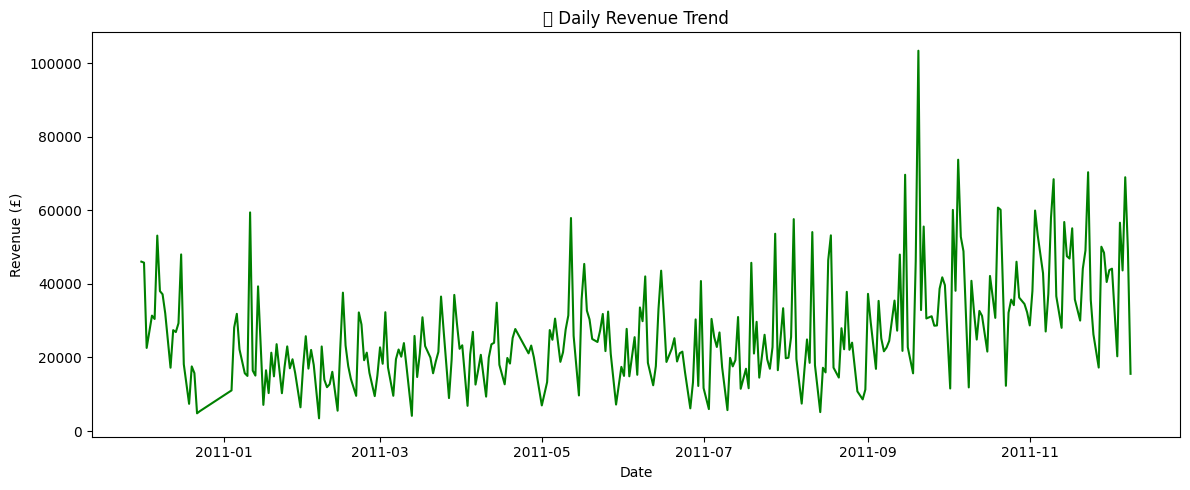

In [18]:
# Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for date only
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Daily Revenue
daily_sales = df.groupby('InvoiceDay')['TotalPrice'].sum()

# Plot
daily_sales.plot(figsize=(12, 5), title="📈 Daily Revenue Trend", color='green')
plt.ylabel("Revenue (£)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

## Customer Insights

In [20]:
# Revenue per customer
cust_revenue = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
print("\n💎 Top 5 Customers by Revenue:\n", cust_revenue.head())

# Frequency per customer
cust_freq = df['CustomerID'].value_counts().head()
print("\n🔁 Most Frequent Customers:\n", cust_freq)


💎 Top 5 Customers by Revenue:
 CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
Name: TotalPrice, dtype: float64

🔁 Most Frequent Customers:
 CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: count, dtype: int64


/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/171890290.py:8: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


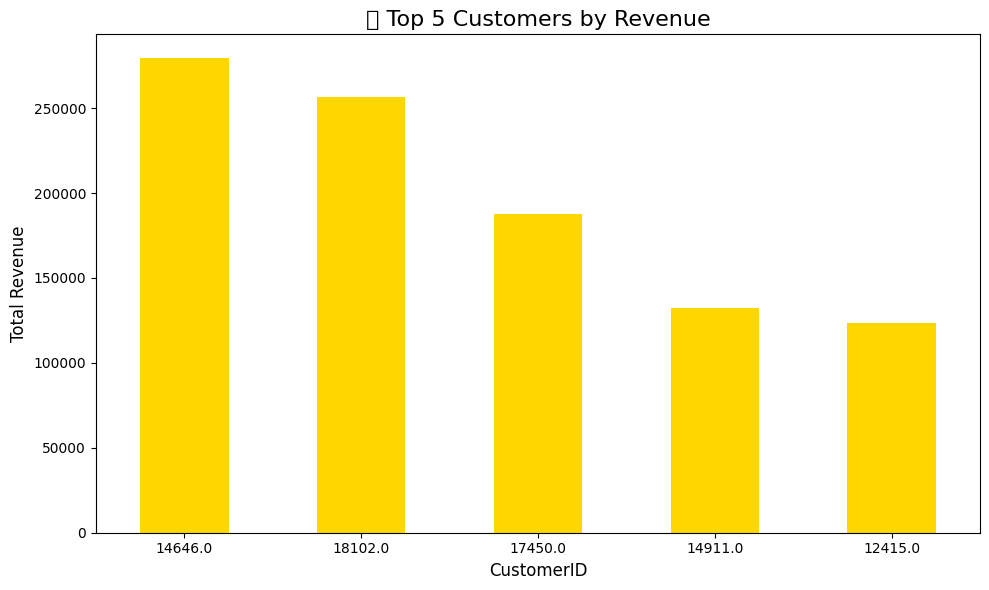

/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/171890290.py:18: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


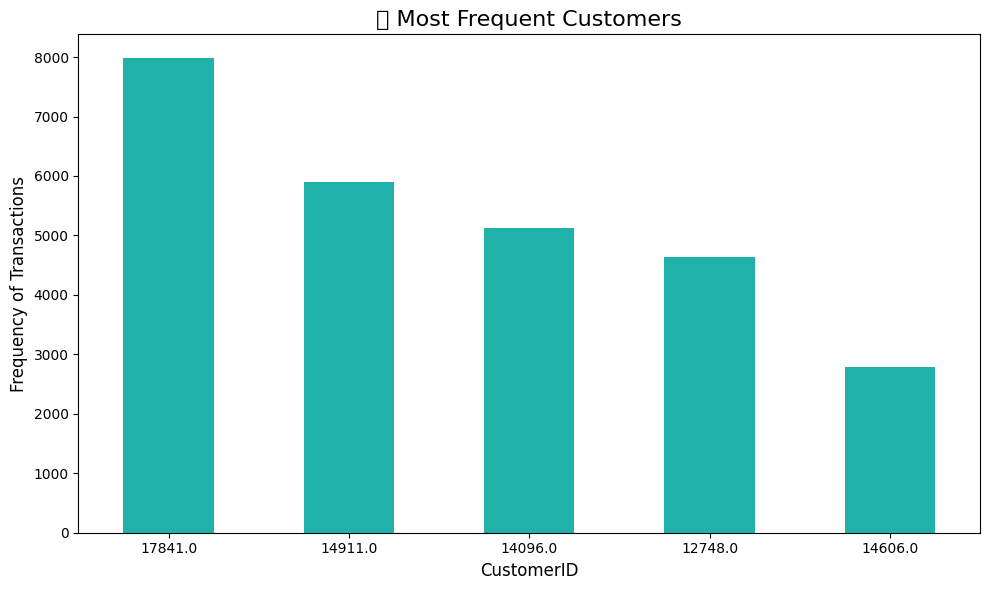

In [21]:
# Bar chart for Top 5 Customers by Revenue
plt.figure(figsize=(10, 6))
cust_revenue.head().plot(kind='bar', color='gold')
plt.title('💎 Top 5 Customers by Revenue', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability
plt.tight_layout()
plt.show()

# Bar chart for Most Frequent Customers
plt.figure(figsize=(10, 6))
cust_freq.plot(kind='bar', color='lightseagreen')
plt.title('🔁 Most Frequent Customers', fontsize=16)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Frequency of Transactions', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability
plt.tight_layout()
plt.show()

# RFM Segmentation

RFM segmentation is a customer segmentation technique that groups customers based on their purchasing behavior: Recency (how recently they bought), Frequency (how often they buy), and Monetary Value (how much they spend). By analyzing these three metrics, businesses can identify and target specific customer segments for more personalized and effective marketing campaigns. 

## Preprocessing

In [25]:
import numpy as np

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove negative or zero quantities and unit prices (likely returns)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Create TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/var/folders/vw/ybvj89290td9583_005hk0nc0000gn/T/ipykernel_85199/3946117155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## Create RFM Table

In [27]:
# Set a reference date for recency (usually the day after the last transaction)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by CustomerID to calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceDate': 'count',  # Frequency will be overwritten
    'TotalPrice': 'sum'      # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Frequency',  # From last aggregation
    'TotalPrice': 'Monetary',
}, inplace=True)

# Recency needs to be recalculated separately
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (snapshot_date - x).days)
rfm['Recency'] = recency
rfm = rfm[['Recency', 'Frequency', 'Monetary']]

## Scoring and Segmentation

In [29]:
# RFM score using quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine into one RFM score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Optionally: Calculate RFM score for sorting or clustering
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

## Analyze Segments

In [31]:
# Top 10 best customers
top_customers = rfm.sort_values('RFM_Score', ascending=False).head(10)
print(top_customers)

# Segment count (for plotting)
print(rfm['RFM_Segment'].value_counts())

            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
CustomerID                                                                     
16931.0           5        898   4604.22       4       4       4         444   
13468.0           2        302   5704.97       4       4       4         444   
17705.0           3        103   1823.52       4       4       4         444   
15113.0          10        100   3609.33       4       4       4         444   
14401.0           4        182   4051.48       4       4       4         444   
13985.0           4        349   7060.13       4       4       4         444   
15727.0          17        302   5178.96       4       4       4         444   
18041.0          12        472   4183.39       4       4       4         444   
17700.0          17        142   2534.64       4       4       4         444   
14408.0          11        107   2606.53       4       4       4         444   

            RFM_Score  
CustomerID     

# K-Means Clustering on scaled RFM values

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
# Select RFM features
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Apply standard scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Convert back to DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=['Recency', 'Frequency', 'Monetary'])

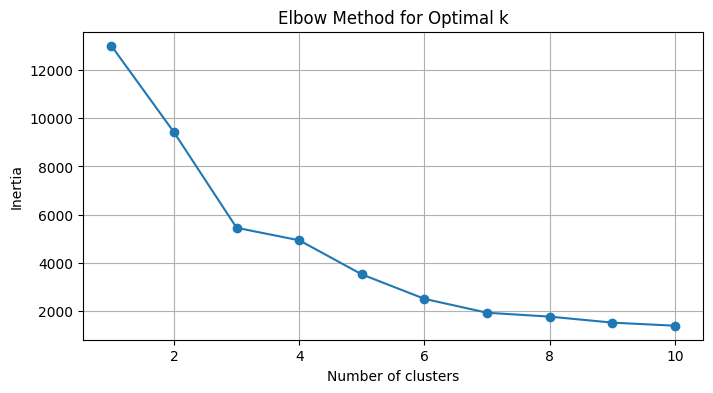

In [35]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

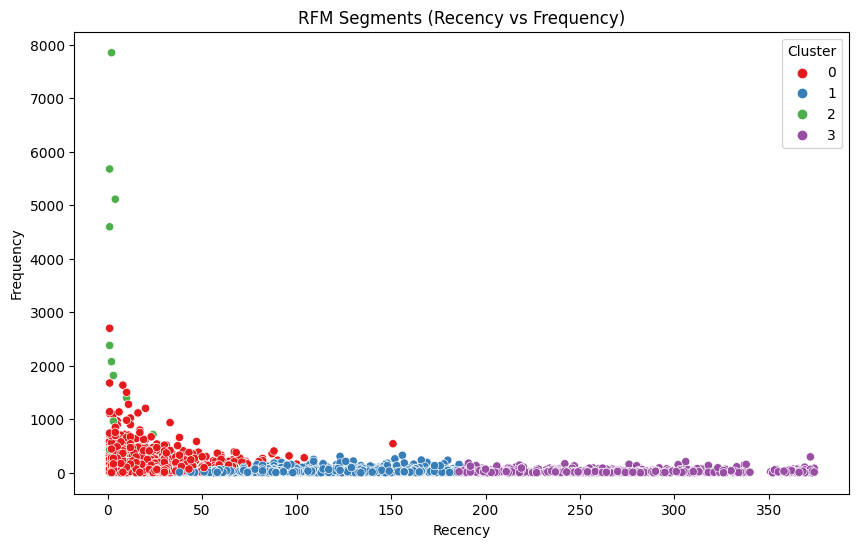

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.title('RFM Segments (Recency vs Frequency)')
plt.show()

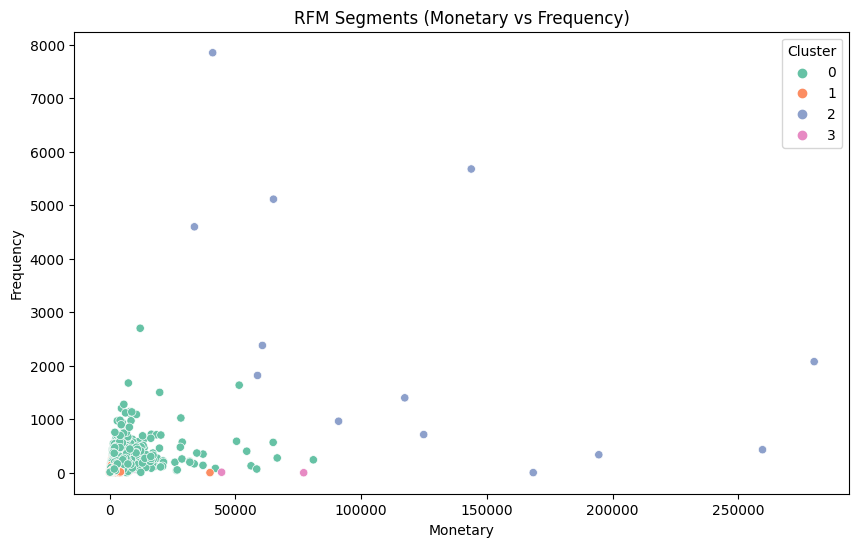

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue='Cluster', palette='Set2')
plt.title('RFM Segments (Monetary vs Frequency)')
plt.show()

         Recency  Frequency  Monetary  Count
Cluster                                     
0           21.0      135.3    2645.8   2171
1           98.2       37.7     773.9   1326
2            4.7     2565.3  126118.3     13
3          272.4       25.1     605.8    828


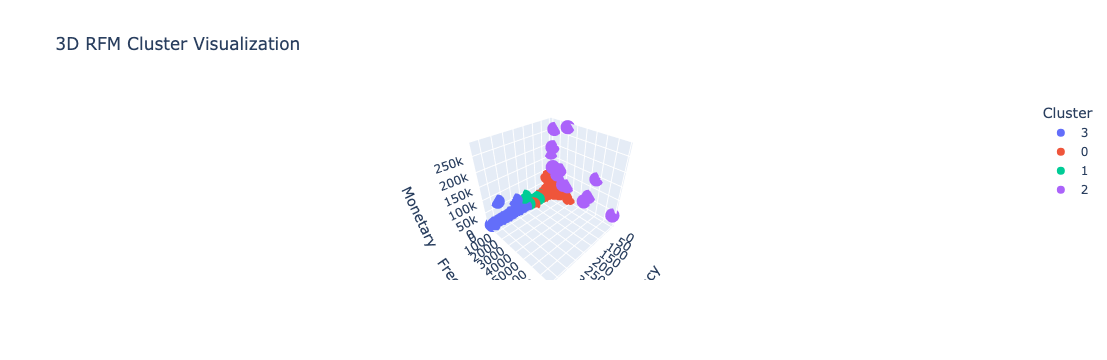

In [40]:
import plotly.express as px

# Compute cluster summary separately
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Add count of members in each cluster
cluster_summary['Count'] = rfm.groupby('Cluster').size()

print(cluster_summary)

# Create the scatter plot
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color=rfm['Cluster'].astype(str),
    title='3D RFM Cluster Visualization',
    labels={'color': 'Cluster'}
)

fig.show()

In [42]:
print(rfm.columns)

Index(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score',
       'RFM_Segment', 'RFM_Score', 'Cluster'],
      dtype='object')


In [44]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Add customer count per cluster
cluster_summary['Count'] = rfm.groupby('Cluster').size()

print(cluster_summary)

         Recency  Frequency  Monetary  Count
Cluster                                     
0           21.0      135.3    2645.8   2171
1           98.2       37.7     773.9   1326
2            4.7     2565.3  126118.3     13
3          272.4       25.1     605.8    828


## Verification of the success of K-Means clustering

In [47]:
# Silhouette Score ✅ Good clustering: Silhouette score > 0.5 (acceptable above 0.3, excellent above 0.7)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled_df)

labels = kmeans.labels_
score = silhouette_score(rfm_scaled_df, labels)

print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.359


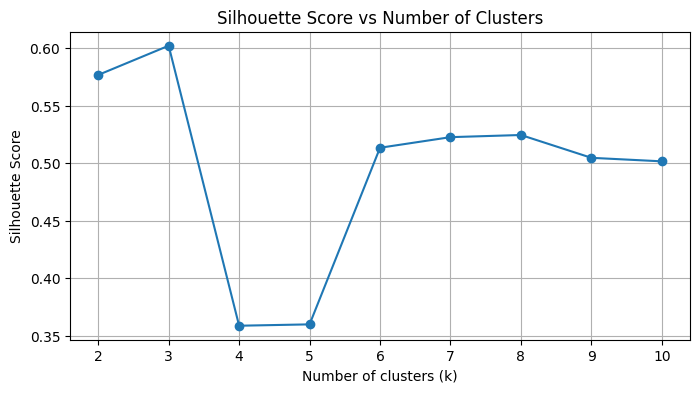

Optimal k (based on silhouette score): 3


In [49]:
sil_scores = []
K = range(2, 11)  # Test k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    labels = kmeans.labels_
    score = silhouette_score(rfm_scaled_df, labels)
    sil_scores.append(score)

# Plot the scores
plt.figure(figsize=(8,4))
plt.plot(K, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print best k
best_k = K[sil_scores.index(max(sil_scores))]
print(f"Optimal k (based on silhouette score): {best_k}")